# Get Embeddings Metadata Exploration

In [30]:
"""Get Embeddings Metadata Exploration

Structure:
    1. Imports, Variables, Functions
    2. Load Data
    3. Plot 
"""

# 1. Imports, Variables, Functions
# imports
import pickle, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import anndata as ad, os, sys

# variables
pp_data = "pp_data-24-08-27-01"

metadata_path = '../data/%s/metadata.pkl'%pp_data
adata_path = '../data/%s/data.h5ad'%pp_data
output_dir = "../outputs/%s"%pp_data

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 2. Load Data
with open(metadata_path,"rb") as f:
    metadata = pickle.load(f)

adata = ad.read_h5ad(adata_path, backed='r') # parameters: backed='r' to read from disk

# Access other attributes without loading adata.X
obs = adata.obs

# 3. Plot 
# get how many datasets, de signatures, control and disease samples

print('Number of datasets:', obs["dataset"].nunique())
print('Number of DE signatures:', len(set([id.split(";")[0] for id in obs["ids"]])))
print('Number of diseases:', obs["disease_study"].nunique())
print('Number of control samples:', len([id.split(";")[2] for id in obs["ids"] if id.split(";")[2] == 'Control']))
print('Number of disease samples:', len([id.split(";")[2] for id in obs["ids"] if id.split(";")[2] != 'Control']))


Number of datasets: 2201
Number of DE signatures: 4468
Number of diseases: 1045
Number of control samples: 58918
Number of disease samples: 70495


In [ ]:

# plot nº of non-nan genes
plt.figure(figsize=(10,5))
plt.title('Number of non-nan genes')
plt.hist(metadata['n_non_nan_genes'], bins=100, color='blue', alpha=0.7)

# plot nº of non-nan samples

plt.figure(figsize=(10,5))
plt.title('Number of non-nan gex')
plt.hist(metadata['n_non_nan_gex'], bins=100, color='blue', alpha=0.7)


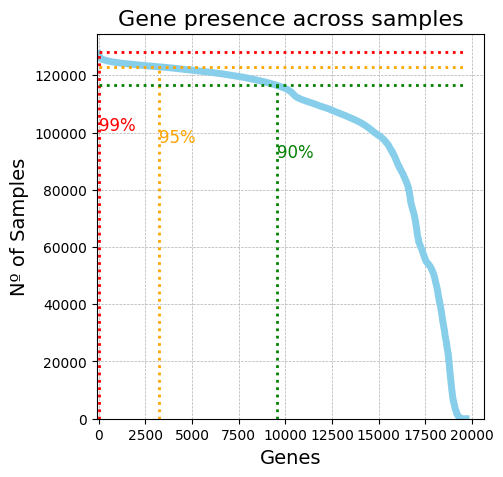

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# sort data
metadata['n_non_nan_genes'].sort()


# Sample data for demonstration
x = list(range(len(metadata['n_non_nan_genes'])))
y = metadata['n_non_nan_genes'][::-1]

# Convert to a line plot
plt.figure(figsize=(5,5))
plt.plot(x, y, color='skyblue', label='Number of non-NaN genes', linewidth=5)

# Calculate thresholds
thresholds = [0.99, 0.95, 0.90]
colors = ['red', 'orange', 'green']

for i, threshold in enumerate(thresholds):
    
    threshold_value = metadata["n_gex"] * threshold
    plt.hlines(threshold_value, 0, len(metadata['n_non_nan_genes']), color=colors[i], linestyles="dotted", linewidth=2)
    
    # Find the index where y meets or exceeds the threshold
    indices = np.where(y >= threshold_value)[0]

    if len(indices) == 0:
        threshold_index = -1
    else:
        threshold_index = indices[-1]
    plt.vlines(threshold_index, 0, threshold_value, color=colors[i], linestyles="dotted", linewidth=2)
        
    # Annotate the vertical line, adjust position dynamically if needed
    plt.text(threshold_index + 1, threshold_value * 0.8, f'{int(threshold * 100)}%', 
                color=colors[i], fontsize=12, va='center')

# Add a title and labels
plt.title('Gene presence across samples', fontsize=16)
plt.xlabel('Genes', fontsize=14)
plt.ylabel('Nº of Samples', fontsize=14)

# Add a legend
# plt.legend()

# Add lim
plt.ylim(0,)
plt.xlim(-100,)


# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.savefig(os.path.join(output_dir, 'gene_presence.png'), dpi=300, bbox_inches='tight')


0
3116
9408


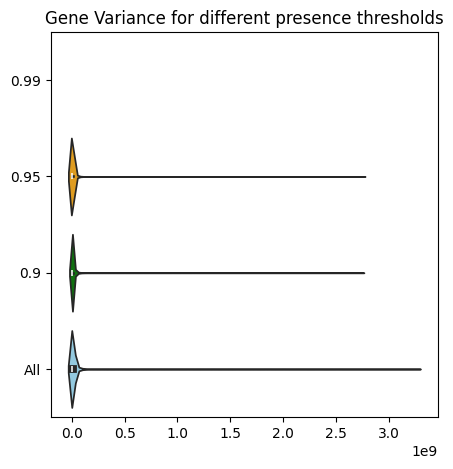

In [32]:
import seaborn as sns
thresholds = [0.99, 0.95, 0.90]

data = dict()
for i in thresholds:
    threshold_value = metadata["n_gex"] * i
    mask = metadata['n_non_nan_genes'] >= threshold_value
    values = metadata['genes_std'][mask]
    values = values[~np.isnan(values)]
    data[i] = values
    print(len(values))


data["All"] = metadata['genes_std'][~np.isnan(metadata['genes_std'])]

# plot gene variance
plt.figure(figsize=(5,5))
plt.title("Gene Variance for different presence thresholds")
sns.violinplot(data=data, orient='h',palette=['red', 'orange', 'green','skyblue'])

plt.savefig(os.path.join(output_dir, 'gene_variance.png'), dpi=300, bbox_inches='tight')
